## Rihal Ramadan Challenge

In this challenge you are given a dataset containing real and fake job posts, your task is to build a machine learning model to classify the fake jobs. 

**What the solution is expected to cover:**
* Data analysis exploring and explaining the main features of the fake job posts dataset. 
* Data preprocessing.
* A machine learning classifier that can accurately detect fake job posts. 
* Evaluatation of the model’s performance.

> ***Note**: Don't forget to Document you work, and provide clear explanations of every step you perform.*

### Importing libraries
Importing basic libraries and visual related libraries

In [2]:
# Importing all required libraries
import numpy as np
import pandas as pd
import re
import string
import numpy as np
import pandas as pd
import random
import missingno
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

Importing libraries related to models and vectorizers

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,roc_auc_score
from sklearn.model_selection import train_test_split
from string import punctuation
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings("ignore")

Importing natural languge processing libraries

In [13]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import en_core_web_sm

Importing libraries for pytorch and neural netwrok

In [14]:
import torch
from torch import nn
import numpy as np
import scipy
from torch import optim
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
torch.__version__

'1.11.0'

### Read Data

**Data Description:**
The dataset contains 17880 job posts categorized as real or fake. Each job posting is defined by a set of features which are: 

* `job_id`: a unique ID for each post 
* `title`: the job title 
* `location`: the location of the job 
* `department`: company department              
* `salary_range`: the expected salary range            
* `company_profile`: company description          
* `description`: the job description                 
* `requirements`: list of the job requirements             
* `benefits`: list of the offered benefits                  
* `telecommuting`: if the position is telecommuting           
* `has_company_logo`: if there is a company logo             
* `has_questions`: if there are screening questions               
* `employment_type`: the type of employment (full-time, part-time, contract, etc.)       
* `required_experience`: the level of experience required for the job (e.g. Internship, Mid-Senior level, Executive)      
* `required_education`: the degree required to work at the company (e.g. Bachelor's, Master's, Doctorate, etc.) 
* `industry`: the field of work (e.g. Automotive, IT, Health care, Real estate, etc.)                 
* `function`: the function of the job (e.g. Consulting, Engineering, Research, etc.)               
* `fraudulent`: whether the job posting is fraudulent or not 

In [15]:
# Read the dataset
data = pd.read_csv(r'C:\Users\DELL\Desktop\Predictive Analytics\Codestacker Challenges\Data Scientist challenge-Fake Job Postings Detection\Data - Data Science.csv')

### Initial overview of the data
Having a sneak peak of the dataset showing the first five rows

In [16]:
# View first five rows of the dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Brief information about the data

In [17]:
#Info about the column data types, memory consumed and not null instances
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

A stastistical analysis to analyze the presence of high level errors and inconsistencies. The analysis does not show any anormalies hence its safer to contiue.

In [20]:
# A brief statistical analysis of the dataset
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Checking the number of instances and attributes in a dataset
data.shape

(17880, 18)

In [22]:
# Checking for duplicate values
data.duplicated().sum()

0

## EDA (Exploratory Data Analysis)
The first plot is heat map, heat maps are good at showing the correlation between features. Here a minimal correlation between **has questions** and **has company logo** columns is observed value 0.23. These values do not contribute much to prediction since they have very minimal correlation with target variable

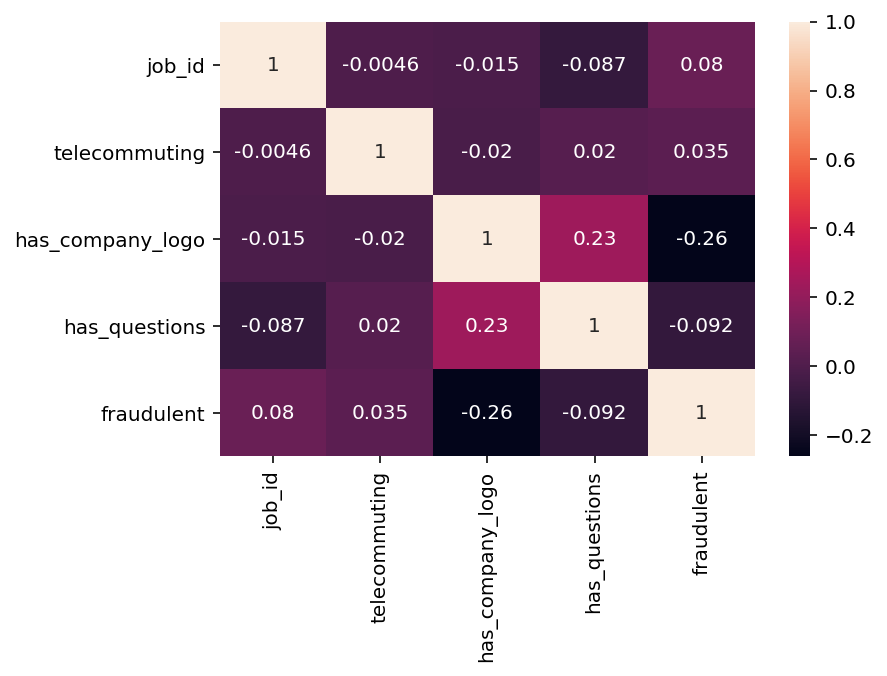

In [23]:
# A heat map plot to check for correlation between features
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [24]:
# Fill the blank spaces in the location column
data.location = data.location.fillna('blank')

In [25]:
# assign data to data_US column
data_US=data

Splitting the location data to **state** and **city** columns

In [26]:
# Splitting the locations in the location column into two new columns state and city
loc_split =[]
for loc in data_US.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)

loc_split = loc_split[[1, 2]]

loc_split = loc_split.rename(columns={1: "state", 2:'city'})

In [27]:
# Reseting the index of the dataframe
data_US = data_US.reset_index()

Joining new columns to the dataset

In [28]:
# Joining the state and city column into the main dataframe
data_US = data_US.join(loc_split)

In [29]:
# Reassuring that all columns are available and arranged accordingly
data_US = data_US[['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'state', 'city']]

Selecting only not null instances in **city and state** column

In [30]:
# Selecting data will no missing values for the corresponding columns (state anc city)
data_US = data_US[data_US['city'].notna()]
data_US = data_US[data_US['state'].notna()]

A new column **state_city** combining **state** and **city** columns

In [31]:
# Grouping state and city columns to a new column state city
data_US['state_city'] = data_US['state'] + ", " + data_US['city']

Checking for null values

In [32]:
# Check for null values
data_US.isna().sum()

job_id                     0
title                      0
location                   0
department             11183
salary_range           14631
company_profile         3189
description                1
requirements            2487
benefits                6903
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3240
required_experience     6768
required_education      7790
industry                4635
function                6167
fraudulent                 0
state                      0
city                       0
state_city                 0
dtype: int64

### Bar plot
This plot shows the amount of fake and real job postings in the dataset. The data is highly imbalaced

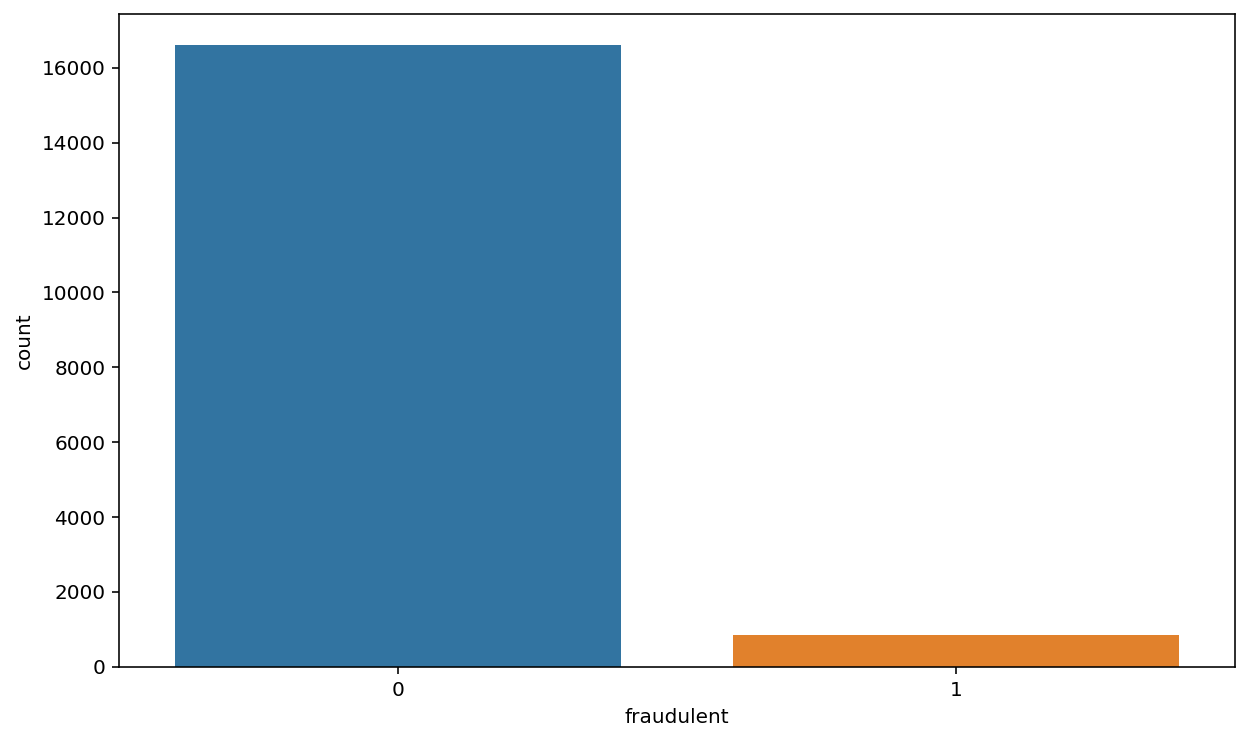

In [33]:
# Checking the number of fraud and not fraudulent in the dataset
plt.figure(figsize=(10,6))
sns.countplot(x='fraudulent', data=data_US);

### Count plots
#### Which locations have the most fraudulent jobs? </br>
The plot answers the question that Huoston has the highest number of fake job postings followed by california (missing name, corresponding plot shows CA verifies its **california**) and new york

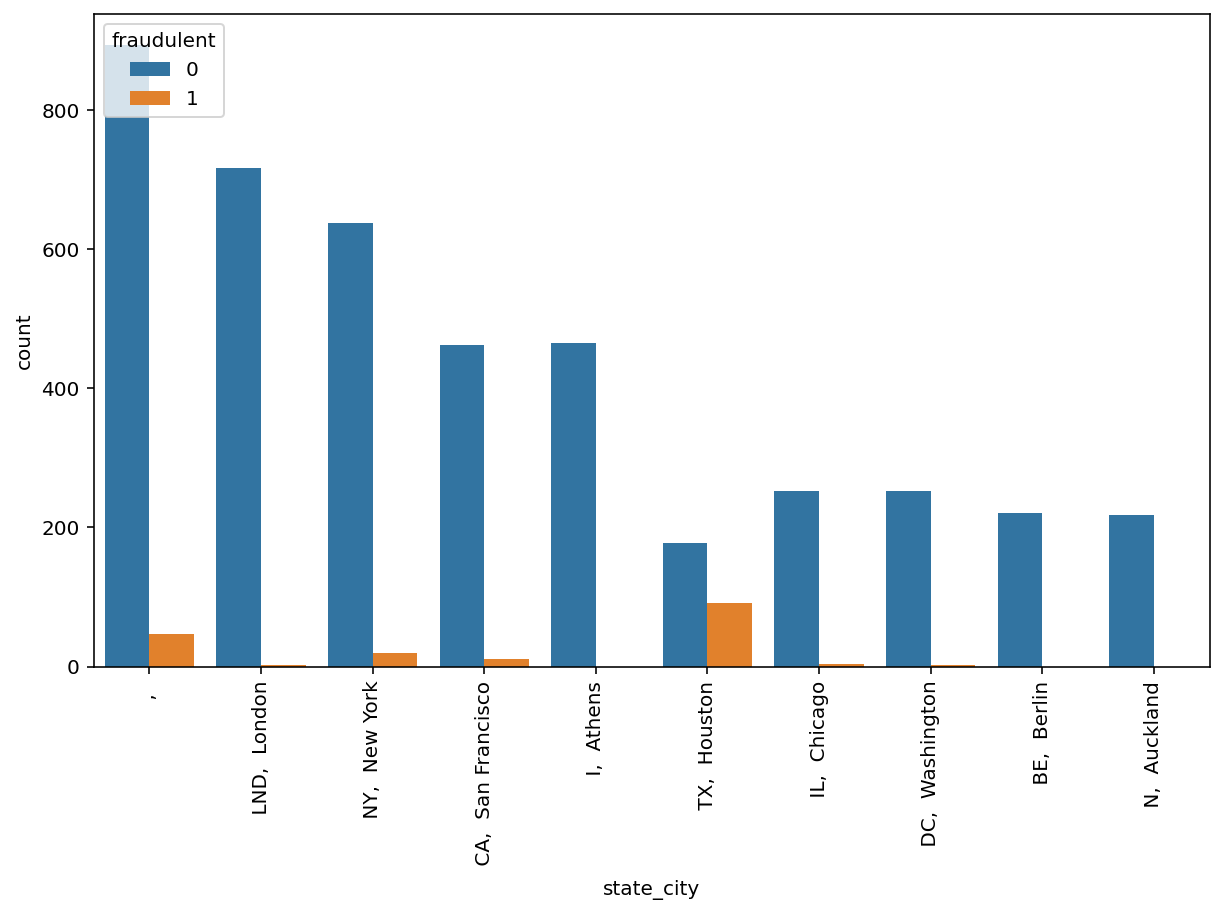

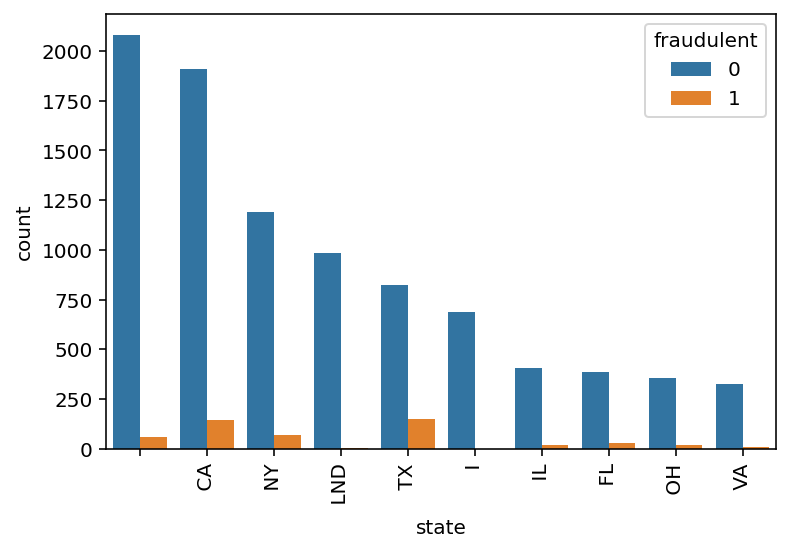

In [34]:
# check which location has most fraudulent jobs
plt.figure(figsize=(10,6))
sns.countplot(x='state_city', data=data_US, hue="fraudulent", order=data_US['state_city'].value_counts(ascending=False).iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

sns.countplot(x='state', data=data_US, hue="fraudulent", order=data_US['state'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

#### What kind of experience is required for most fake jobs?
This plot shows that **entry level** jobs have highest fraud job postings followed by mid-senior level

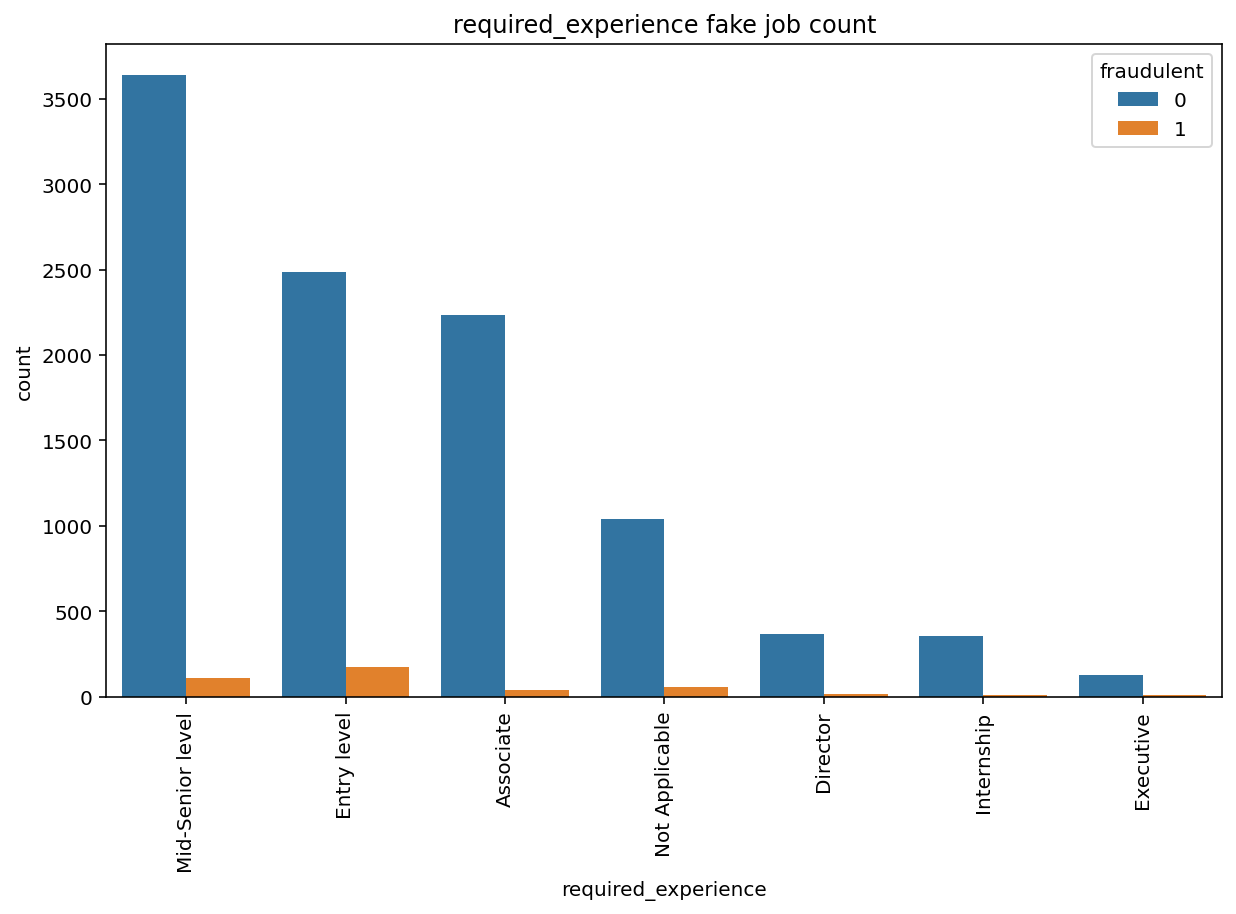

In [35]:
# checks which level is mostly required for fraudulent postings
plt.figure(figsize=(10,6))
sns.countplot(x='required_experience', data=data_US, hue="fraudulent",
              order=data_US['required_experience'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
title = 'required_experience' + ' fake job count'
plt.title(title)
plt.show()

#### What type of employment do most fake jobs posting require?
This plot shows that **full time** employment has highest fraud job postings

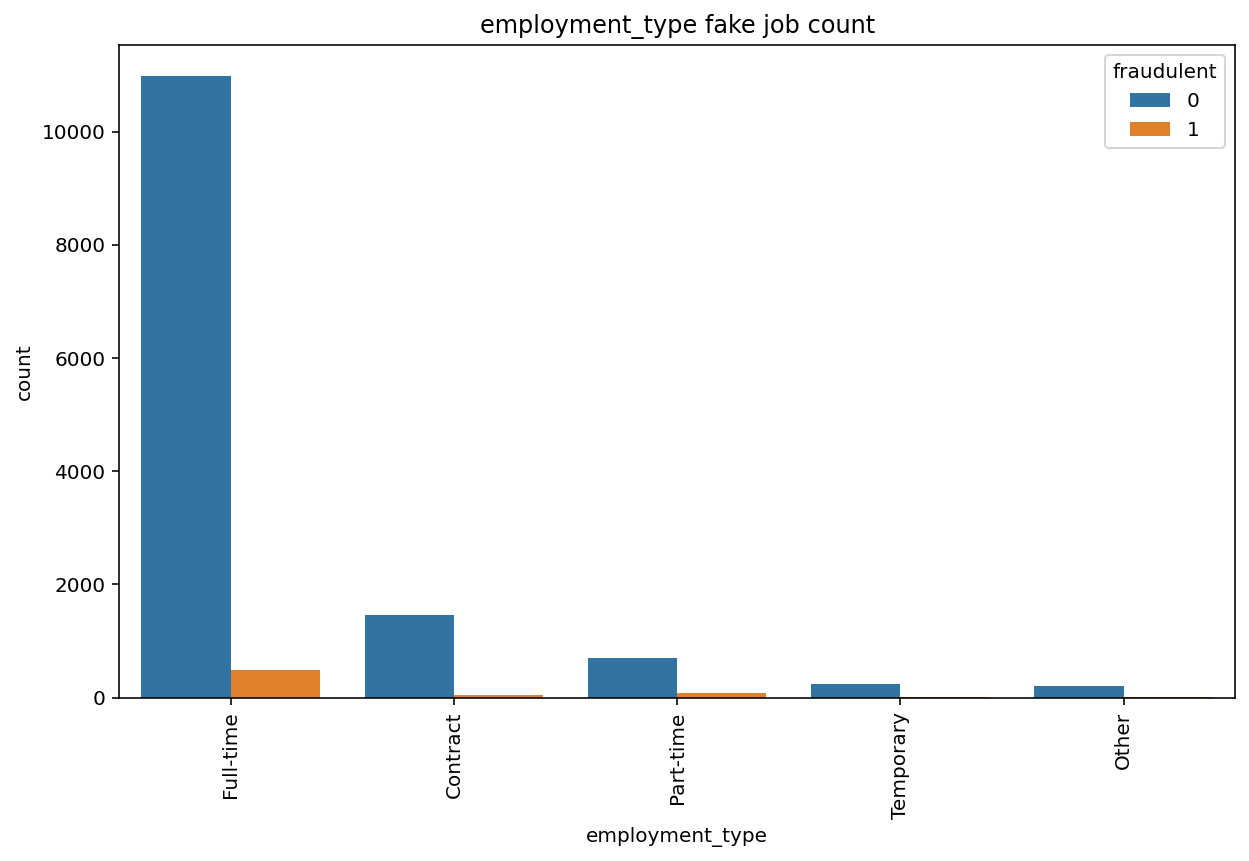

In [36]:
# what type of employment do most fake jobs posting require
plt.figure(figsize=(10,6))
sns.countplot(x='employment_type', data=data_US, hue="fraudulent",
              order=data_US['employment_type'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
title = 'employment_type' + ' fake job count'
plt.title(title)
plt.show()

#### What education level is required for most fraudulent job postings?
This shows that most fraud job postings request high school diplomas followed by bachelors degree

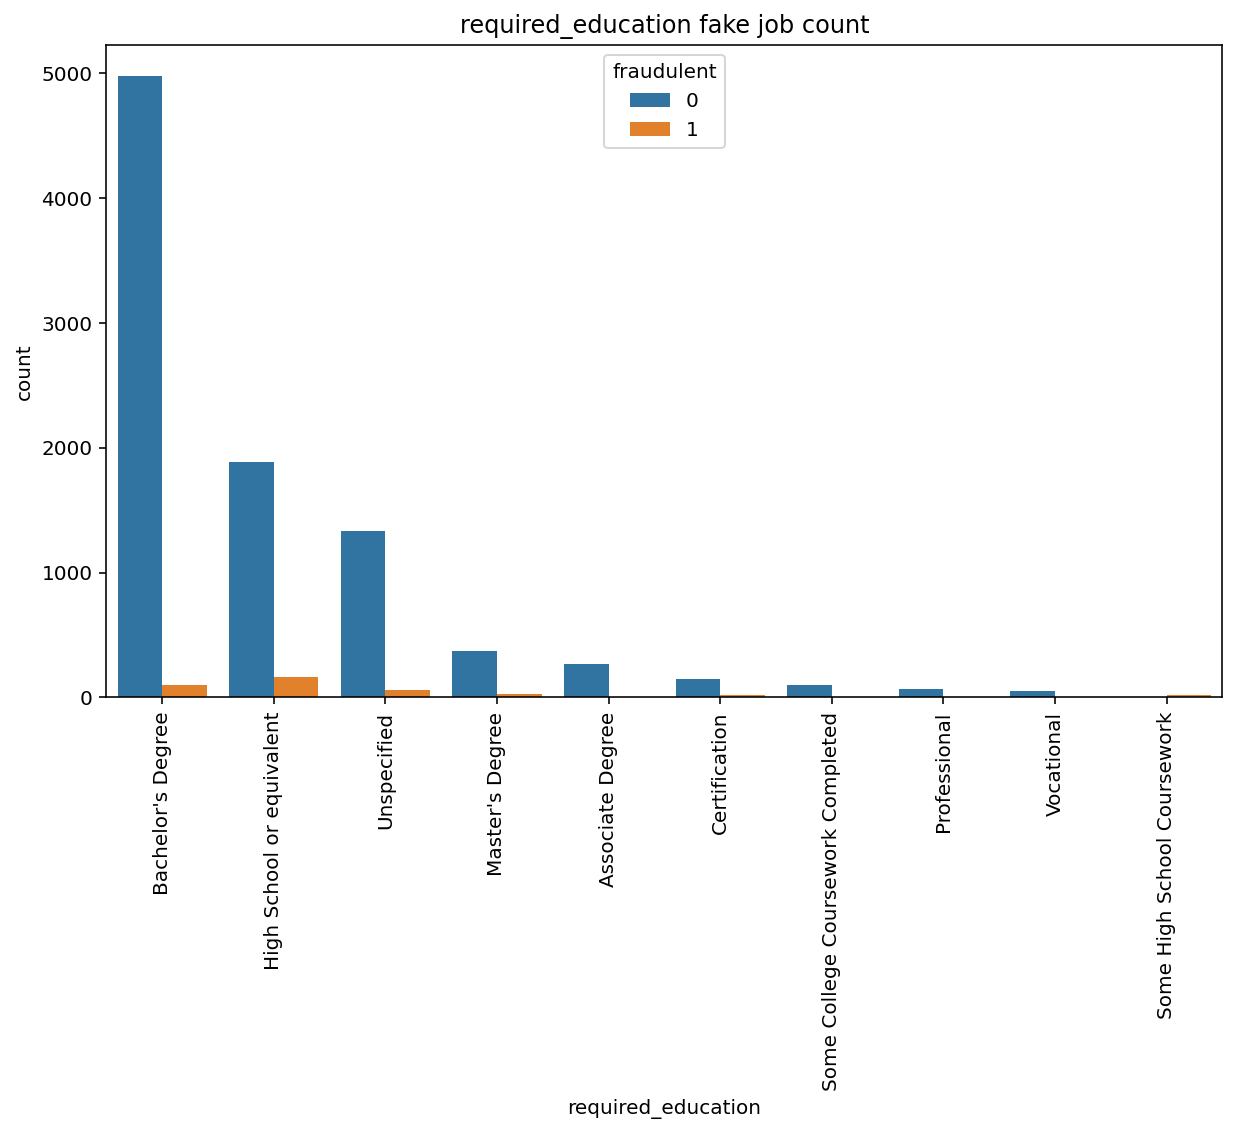

In [37]:
# what education level is required for most fraudulent job postings
plt.figure(figsize=(10,6))
sns.countplot(x='required_education', data=data_US, hue="fraudulent",
              order=data_US['required_education'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
title = 'required_education' + ' fake job count'
plt.title(title)
plt.show()

#### Which industries have the highest number of fake jobs?
Oil and Energy industries are targeted the most for fake jobs

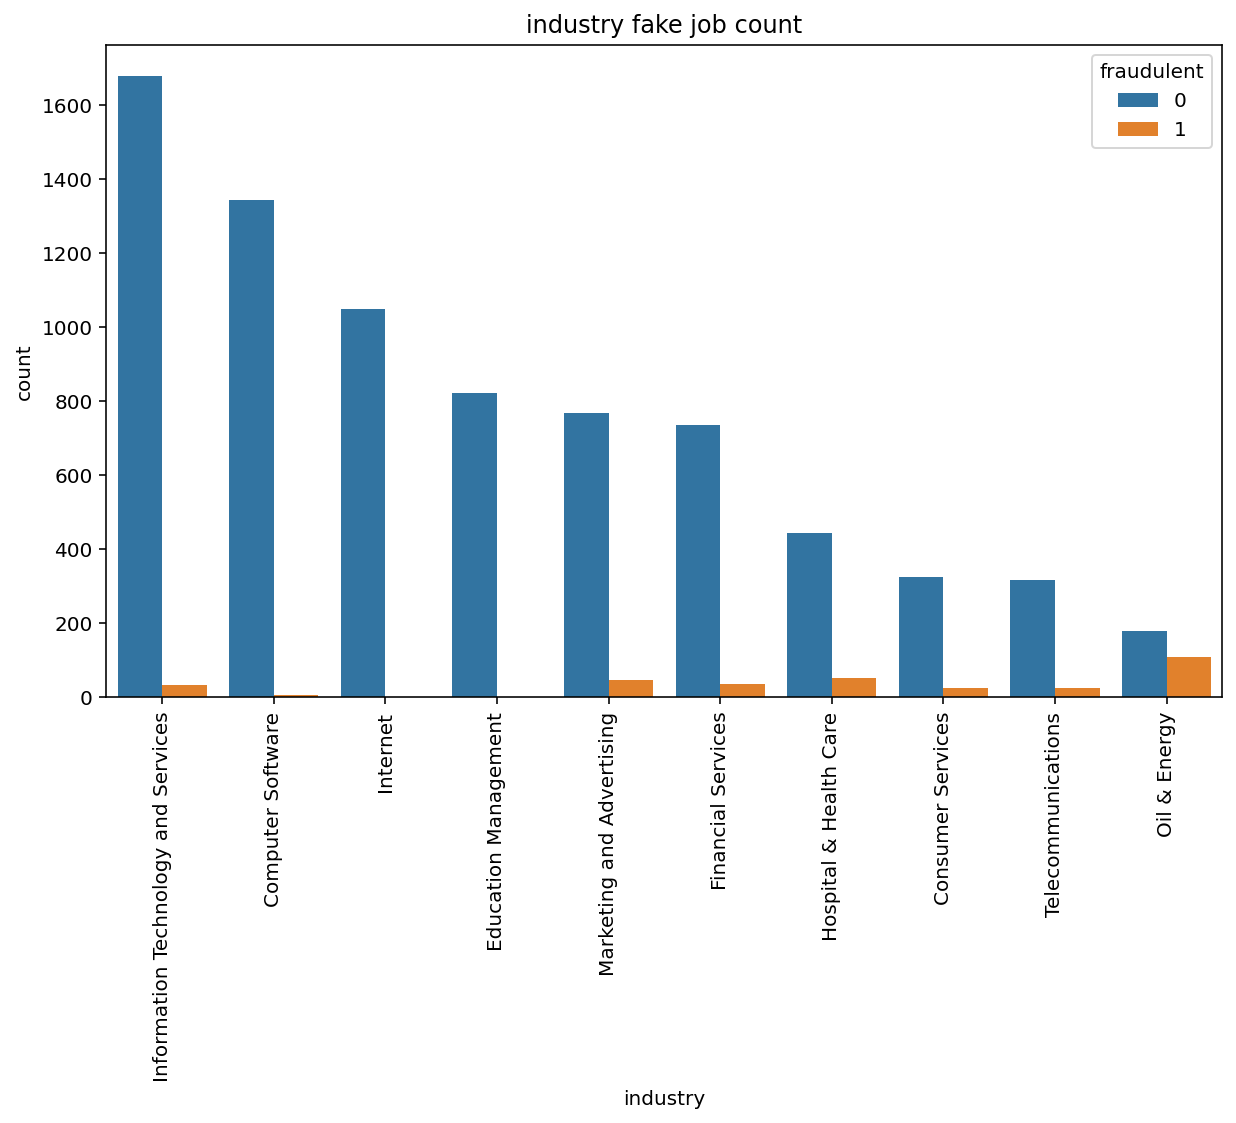

In [38]:
# which industry has the most fake job postings
plt.figure(figsize=(10,6))
sns.countplot(x='industry', data=data_US, hue="fraudulent",
              order=data_US['industry'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
title = 'industry' + ' fake job count'
plt.title(title)
plt.show()

### Data preprocessing
All text related columns are stored in one variable **text** while the individual columns are deleted since they have no more use. These features are selected as they have showed contribution and significance corresponding to target variable. Hence they will be used for prediction

In [39]:
# combine all columns with text in a new column called "text" and dropping individual columns
data_US['text'] =  data_US['title'] + ' ' + data_US['location'] + ' ' + data_US['company_profile'] + ' ' + \
        data_US['description'] + ' ' + data_US['requirements'] + ' ' + data_US['benefits'] + ' ' + \
        data_US['required_experience'] + ' ' + data_US['required_education'] + ' ' + data_US['industry'] + ' ' + data_US['function']


data_US.drop(['job_id', 'department', 'salary_range', 'title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function', 'city', 'state_city', 'has_company_logo', 'has_questions', 'state'], axis = 1, inplace = True)

Eliminating the rows with missing values

In [40]:
# eliminate all null values
data_US=data_US.dropna()

Checking if missing values are eliminated

In [41]:
# check the remaining instances and attributes
data_US.shape

(4482, 3)

Rechecking the remaining columns and changes made

In [42]:
# view the remaining data
data_US.head()

,telecommuting,fraudulent,text
3,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."
6,0,0,"Head of Content (m/f) DE, BE, Berlin Founded i..."
14,0,0,"Account Executive - Sydney AU, NSW, Sydney Adt..."
15,0,0,"VP of Sales - Vault Dragon SG, 01, Singapore J..."


### Character count plot
This shows that the frequency of words in fake jobs are lesser than real jobs.

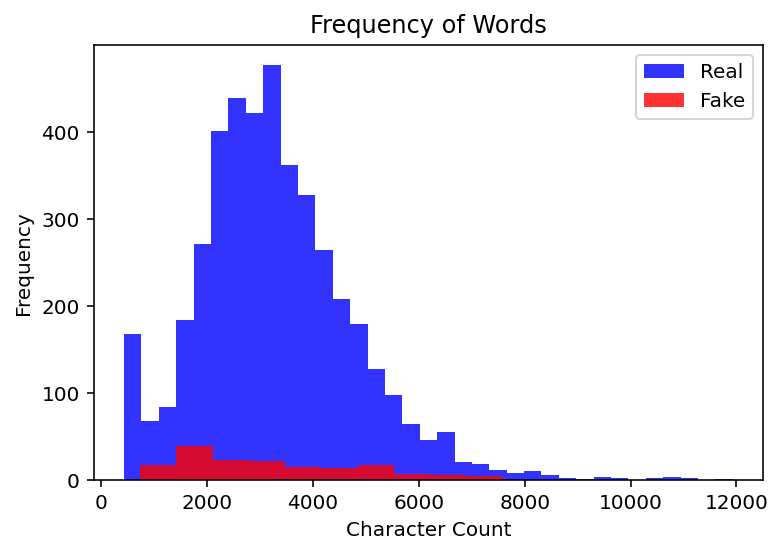

In [43]:
# check the total number of words for real and fake job postings
data_US['character_count'] = data_US.text.apply(len)

data_US[data_US.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
data_US[data_US.fraudulent==1].character_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

In [46]:
# dropping the character count column
data=data_US
data.drop(['character_count'], axis = 1, inplace = True)
data.drop(['telecommuting'], axis = 1, inplace = True)

In [47]:
# confirming the remaining data
data.head()

,fraudulent,text
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."
6,0,"Head of Content (m/f) DE, BE, Berlin Founded i..."
14,0,"Account Executive - Sydney AU, NSW, Sydney Adt..."
15,0,"VP of Sales - Vault Dragon SG, 01, Singapore J..."


### Data Transformation
The text data is preprocessed and stopwords, punctuations and other unwanted characters are removed

In [48]:
# Creating list of punctuation marks
punctuations = string.punctuation

# Creating list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Loading the English tokenizer, tagger, parser and word vectors
parser = English()

# Creating the tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing and lowercasing all tokens
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

#     # Removing all stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return list of tokens
    return mytokens

More text cleaning to boost the accuracy and perfomance

In [49]:
# Customized transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning the Text
        return [clean_text(text) for text in X]
        # declaring the fit function
    def fit(self, X, y=None, **fit_params):
        return self
        # return the paramters obtained
    def get_params(self, deep=True):
        return {}

# function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

TFid Vectorizer is used to convert text into vectors also priortizing the important features

In [50]:
# changing words into vectors using tfid vectorizer
bowtf_vector=TfidfVectorizer(analyzer='char',tokenizer = spacy_tokenizer,ngram_range=(1,3))

### Splitting Data
The data is split into training and testing with 30% data for testing

In [51]:
# splitting our data in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

### Fit data to Model (Random Forest)
* Here a pipe is created which combines the cleaning function, tfid vectorizer function and the model. 
* The data is passed through these functions accordingly.
* Hence the data is cleaned then vectorized and then classified

In [52]:
# random forest model
clf = RandomForestClassifier()

# Create pipeline for all three functions
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bowtf_vector),
                 ('classifier', clf)])

# fitting our model
pipe.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000164E052D8E0>),
                ('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x00000164D242D670>)),
                ('classifier', RandomForestClassifier())])

### Test the model
The model is tested by passing the testing set from which the accuracy and recall is determined

In [66]:
# testing the model with predict function
predicted2 = pipe.predict(X_test)

# checking for Accuracy and recall
rfa_score= accuracy_score(y_test, predicted2)
print("Random Forest Accuracy:", rfa_score)
rfr_score=recall_score(y_test, predicted)
print("Random Forest Recall:", recall_score(y_test, predicted2))

Random Forest Accuracy: 0.9947955390334573
Random Forest Recall: 0.8372093023255814


### Fit to model (Logistic Regression)

In [54]:
# logistic regression model
clf = LogisticRegression()

# Create pipeline for all three functions
pipe2 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bowtf_vector),
                 ('classifier', clf)])

# fitting our model.
pipe2.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000164E052DA30>),
                ('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x00000164D242D670>)),
                ('classifier', LogisticRegression())])

In [55]:
# testing the model with predict function
predicted = pipe2.predict(X_test)

# checking for Accuracy and recall
lra_score=accuracy_score(y_test, predicted)
print("Logistic Regression Accuracy:", lra_score)
lrr_score=recall_score(y_test, predicted)
print("Logistic Regression Recall:", lrr_score)

Logistic Regression Accuracy: 0.9680297397769517
Logistic Regression Recall: 0.0


### Fit to model (Support Vector Machine)

In [56]:
# support vector machine model
clf = SVC()

# Create pipeline for all three functions
pipe3 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bowtf_vector),
                 ('classifier', clf)])

# fitting our model.
pipe3.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000164E0B980D0>),
                ('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x00000164D242D670>)),
                ('classifier', SVC())])

In [57]:
# testing the model with predict function
predicted = pipe3.predict(X_test)

# checking for Accuracy and recall
svca_score=accuracy_score(y_test, predicted)
print("SVC Accuracy:", svca_score)
svcr_score=recall_score(y_test, predicted)
print("SVC Recall:", svcr_score)

SVC Accuracy: 0.9680297397769517
SVC Recall: 0.0


### Fit to model (XGBoost)

In [58]:
# XGboost ensemble model
clf = XGBClassifier()

# Create pipeline for all three functions
pipe4 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bowtf_vector),
                 ('classifier', clf)])

# fitting our model.
pipe4.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000164E0B98550>),
                ('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x00000164D242D670>)),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_roun...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                  

In [59]:
# testing the model with predict function
predicted1 = pipe4.predict(X_test)

# checking for Accuracy and recall
XGBa_score=accuracy_score(y_test, predicted1)
print("XGBoost Accuracy:", XGBa_score)
XGBr_score=recall_score(y_test, predicted1)
print("XGBoost Recall:", XGBr_score)

XGBoost Accuracy: 0.9940520446096655
XGBoost Recall: 0.813953488372093


### Fit to Model (Multinomial Naive Bayes)

In [60]:
# Multinomial Naive Bayes model
clf = MultinomialNB()

# Create pipeline for all three functions
pipe4 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bowtf_vector),
                 ('classifier', clf)])

# fitting our model.
pipe4.fit(X_train,y_train)

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000164E0B98EE0>),
                ('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3),
                                 tokenizer=<function spacy_tokenizer at 0x00000164D242D670>)),
                ('classifier', MultinomialNB())])

In [61]:
# testing the model with predict function
predicted = pipe4.predict(X_test)

# checking for Accuracy and recall
NBa_score= accuracy_score(y_test, predicted)
NBr_score=recall_score(y_test, predicted)
print("NaiveBayes Accuracy:", NBa_score)
print("NaiveBayes Recall:", NBr_score)

NaiveBayes Accuracy: 0.9680297397769517
NaiveBayes Recall: 0.0


### Comparison of Models
All the models are compared on basis of accuracy and recall

In [62]:
# declaring data for model variable (string name and corresponding scores)
models = [('SVM', svca_score,svcr_score),
          ('Logistic Regression', lra_score,lrr_score),
          ('Naive Bayes', NBa_score,NBr_score),
          ('XGBoost', XGBa_score,XGBr_score),
          ('Random Forest', rfa_score,rfr_score),
         ]

In [63]:
# creating a table based on the variable models
predict = pd.DataFrame(data = models, columns=['Model', 'Accuracy', 'Recall'])
predict

,Model,Accuracy,Recall
0,SVM,0.968030,0.000000
1,Logistic Regression,0.968030,0.000000
2,Naive Bayes,0.968030,0.000000
3,XGBoost,0.994052,0.813953
4,Random Forest,0.994796,0.837209


Random Forest shows the highest accuracy of **99.5%** followed by random forest

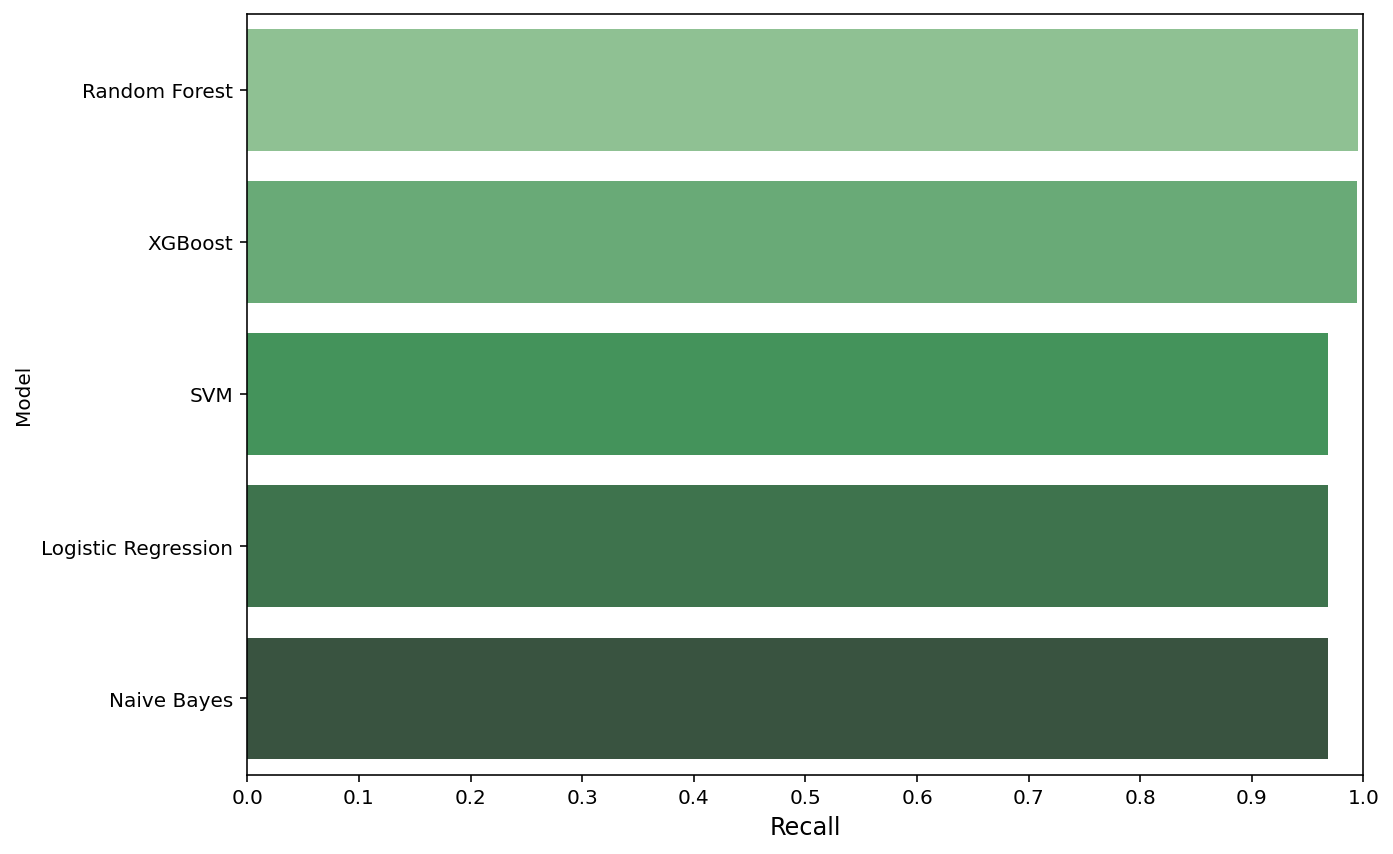

In [64]:
# checking the model with highest accuracy
predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)

f, axes = plt.subplots(1,figsize=(10,7))

sns.barplot(x='Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes)
axes.set_xlabel('Recall', size=12)
axes.set_ylabel('Model')
axes.set_xlim(0,1.0)
axes.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

Random Forest also shows the highest value of recall which evaluates the model ability to classify wrong and correct values accordingly.The score is **83.7%** followed by random forest recall. Other models show zero recall since they failed to identify true positive values

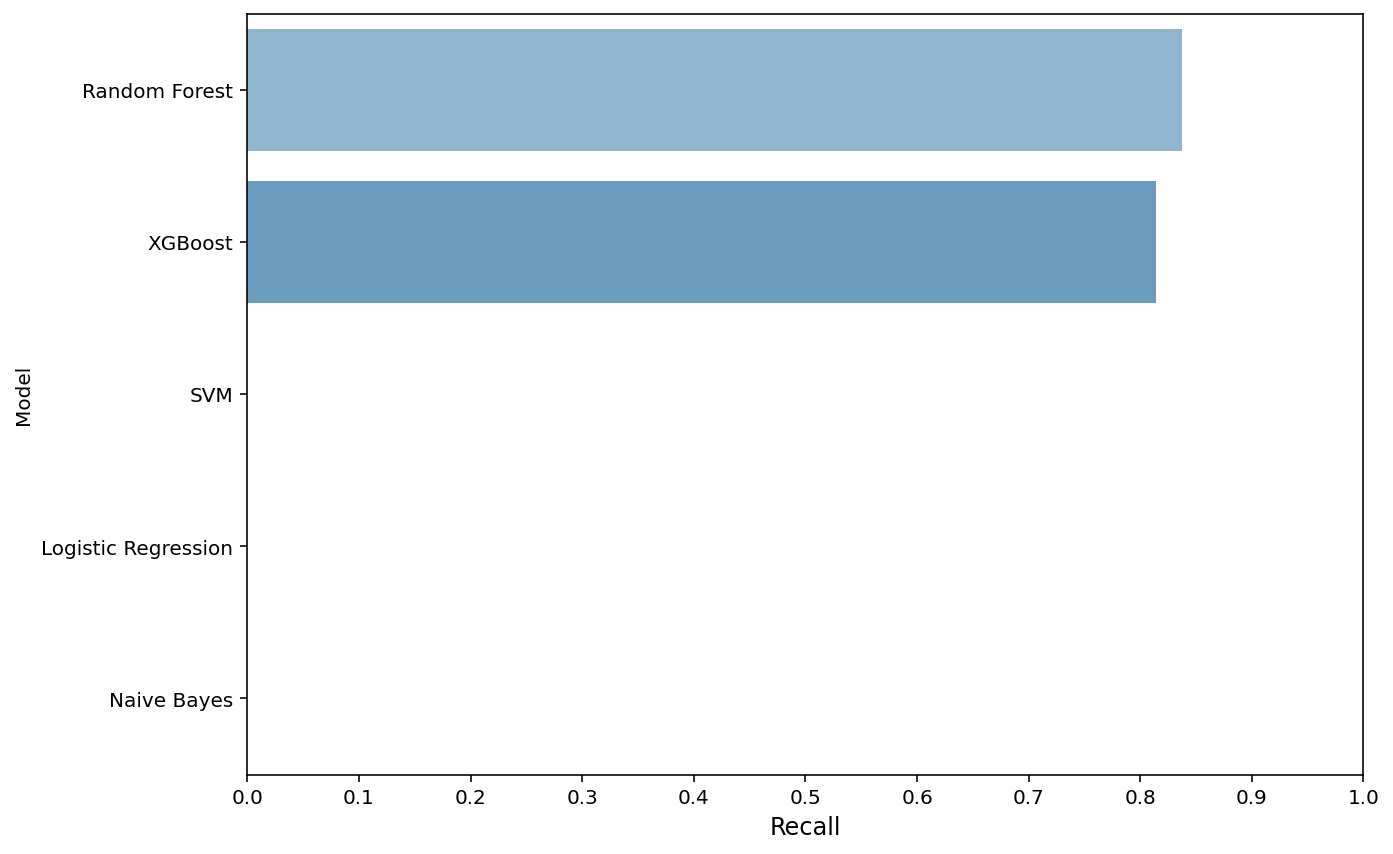

In [65]:
# checking the model with highest recall
predict.sort_values(by=['Recall'], ascending=False, inplace=True)

f, axes = plt.subplots(1,figsize=(10,7))

sns.barplot(x='Recall', y='Model', data = predict, palette='Blues_d', ax = axes)
axes.set_xlabel('Recall', size=12)
axes.set_ylabel('Model')
axes.set_xlim(0,1.0)
axes.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Best Model Evaluation
#### Classification Report
The parameters for evaluation like recall, precisiion f1-score etc. are shown below

In [67]:
# print a classification report for the best model
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1302
           1       1.00      0.84      0.91        43

    accuracy                           0.99      1345
   macro avg       1.00      0.92      0.95      1345
weighted avg       0.99      0.99      0.99      1345



#### Confusion Matrix
* True Positive = ‘1302’ means that 1302 non-fraudulent values are classified correctly by the model.
* True Negative = ‘36’ means that 36 fraudulent values are classified correctly by the model.
* False Positive = ‘7’ means that 7 non-fraudulent values are classified incorrectly by the model.
* False Negative = ‘0’ means that 0 fraudulent values are classified incorrectly by the model.


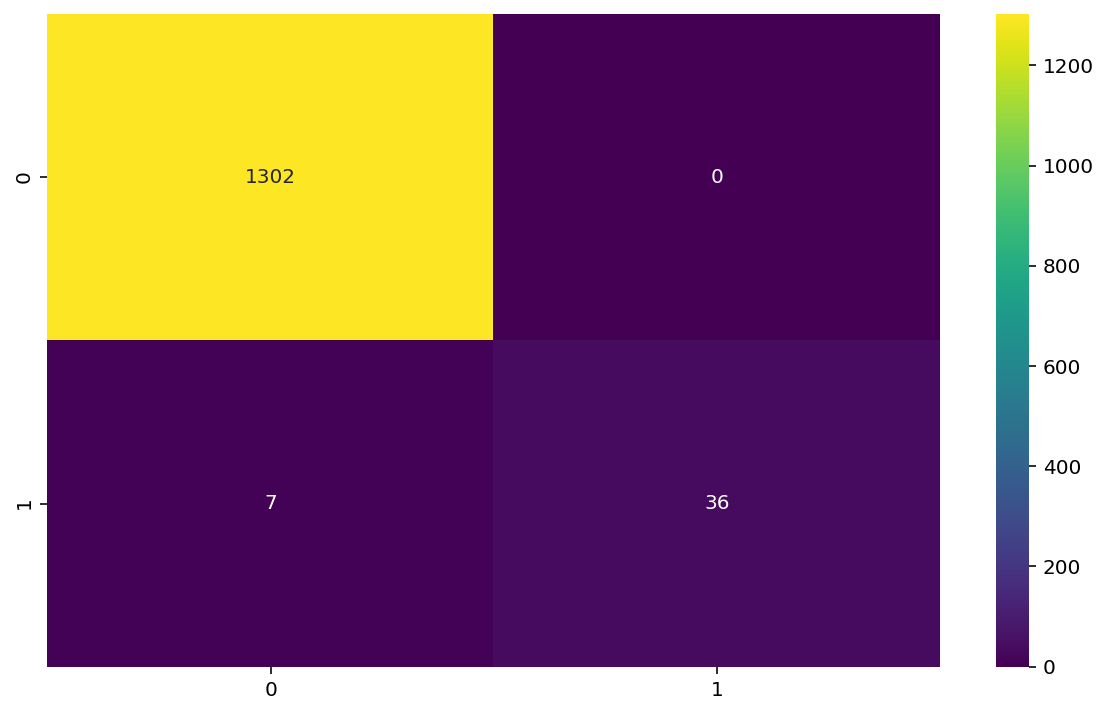

In [69]:
# building the confusion matrix to check the results
plt.figure(figsize=(10,6))
from sklearn.metrics import confusion_matrix
cm=sns.heatmap(confusion_matrix(y_test, predicted2), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

#### ROC Analysis
The graph shows that the area under graph has value of 91.8% meaning the model did well overall.

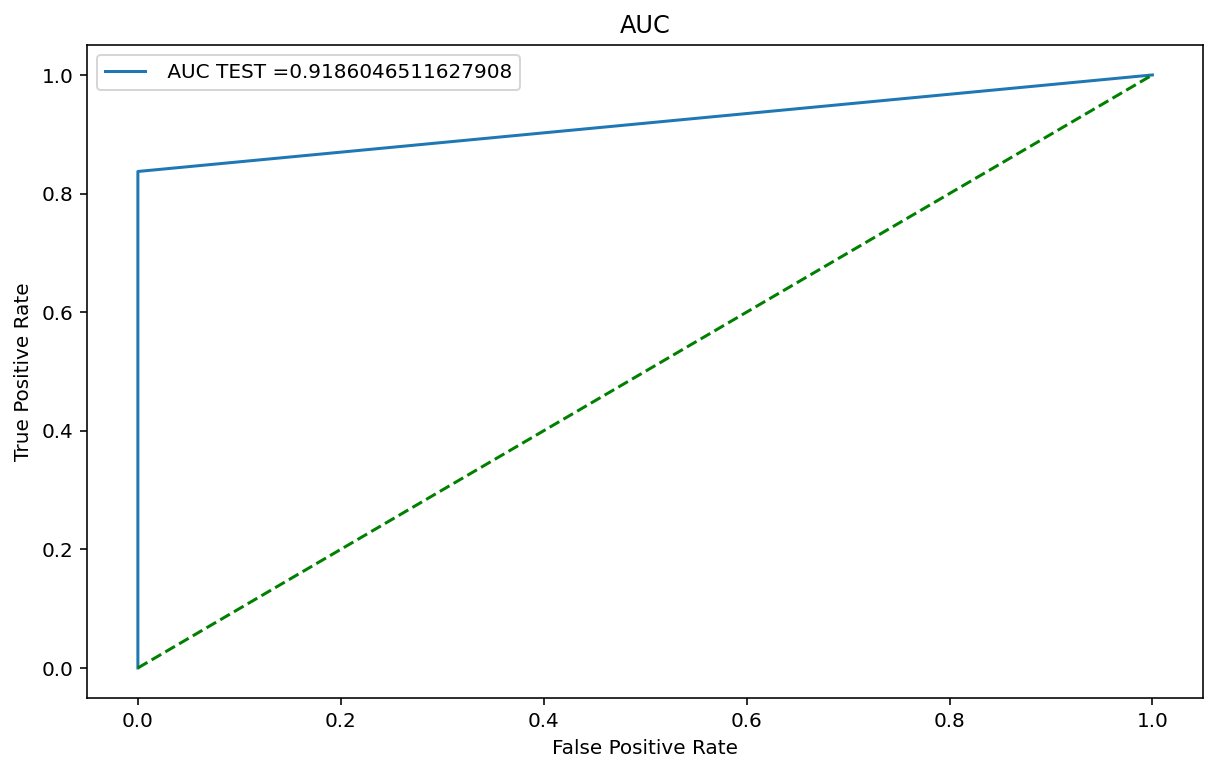

In [72]:
# building the roc curve to check the results
plt.figure(figsize=(10,6))
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, predicted2)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

## Deep Learning using Pytorch
With efforts to familarize with pytorch, this deep learning is applied with the dataset. The aim is to showcase effort on learning pytorch.

### Split Data
Data is divided for training and testing with 20% data for testing and random state value of 42.

In [80]:
#  split the data for training and testin
x_train, x_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.2, random_state=42)

### TFid Vectorizer
Tfid is used to convert text to vectors, vectors for training and testing sets

In [81]:
# chaning text to vectors using tfid vectorizwe
vectorizer = TfidfVectorizer()

# Vectorizing train texts
x_train = vectorizer.fit_transform(x_train)

# Vectorizing test texts
x_test = vectorizer.transform(x_test)

### Converting to pytorch tensor (Training Set)

In [82]:
# Convert tfidf vectors into pytorch tensor for feeding into pytorch neural network (training set)
x_train = torch.tensor(scipy.sparse.csr_matrix.todense(x_train)).float()
x_test = torch.tensor(scipy.sparse.csr_matrix.todense(x_test)).float()

### Converting to pytorch tensor (Testing Set)

In [83]:
# Convert labels into pytorch tensor (testing set)
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

### Building the Multilayer Preceptron

In [84]:
# declaring the modl
model = nn.Sequential(nn.Linear(x_train.shape[1], 64),
                      nn.ReLU(),
                      nn.Dropout(0.1),
                      nn.Linear(64, data_US.fraudulent.nunique()),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Forward pass, get our logits
logps = model(x_train)
# Calculate the loss with the logits and the labels
loss = criterion(logps, y_train)

loss.backward()

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.002)

### Training and Testing the Model (epochs= 50)

In [85]:
# keep track of losses along with the time taken
%time
train_losses = []
test_losses = []
test_accuracies = []

# train the neural network with 50 epochs
epochs = 50

# loop to train with all epochs
for e in range(epochs):
    optimizer.zero_grad()

    output = model.forward(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    train_loss = loss.item()
    train_losses.append(train_loss)
    
    optimizer.step()

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_ps = model(x_test)
        test_loss = criterion(log_ps, y_test)
        test_losses.append(test_loss)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == y_test.view(*top_class.shape)
        test_accuracy = torch.mean(equals.float())
        test_accuracies.append(test_accuracy)
# train the model
    model.train()

    print(f"Epoch: {e+1}/{epochs}.. ",
          f"Training Loss: {train_loss:.3f}.. ",
          f"Test Loss: {test_loss:.3f}.. ",
          f"Test Accuracy: {test_accuracy:.3f}")

Wall time: 0 ns
Epoch: 1/50..  Training Loss: 0.702..  Test Loss: 0.681..  Test Accuracy: 0.958
Epoch: 2/50..  Training Loss: 0.681..  Test Loss: 0.659..  Test Accuracy: 0.958
Epoch: 3/50..  Training Loss: 0.659..  Test Loss: 0.636..  Test Accuracy: 0.958
Epoch: 4/50..  Training Loss: 0.635..  Test Loss: 0.611..  Test Accuracy: 0.958
Epoch: 5/50..  Training Loss: 0.609..  Test Loss: 0.585..  Test Accuracy: 0.958
Epoch: 6/50..  Training Loss: 0.583..  Test Loss: 0.558..  Test Accuracy: 0.958
Epoch: 7/50..  Training Loss: 0.555..  Test Loss: 0.531..  Test Accuracy: 0.958
Epoch: 8/50..  Training Loss: 0.528..  Test Loss: 0.503..  Test Accuracy: 0.958
Epoch: 9/50..  Training Loss: 0.499..  Test Loss: 0.475..  Test Accuracy: 0.958
Epoch: 10/50..  Training Loss: 0.470..  Test Loss: 0.447..  Test Accuracy: 0.958
Epoch: 11/50..  Training Loss: 0.441..  Test Loss: 0.419..  Test Accuracy: 0.958
Epoch: 12/50..  Training Loss: 0.412..  Test Loss: 0.392..  Test Accuracy: 0.958
Epoch: 13/50..  Train

### Visualizing Accuracy and Loss
It is observed that the accuracy increases while the loss decreases. Accuracy achieved **~96%**

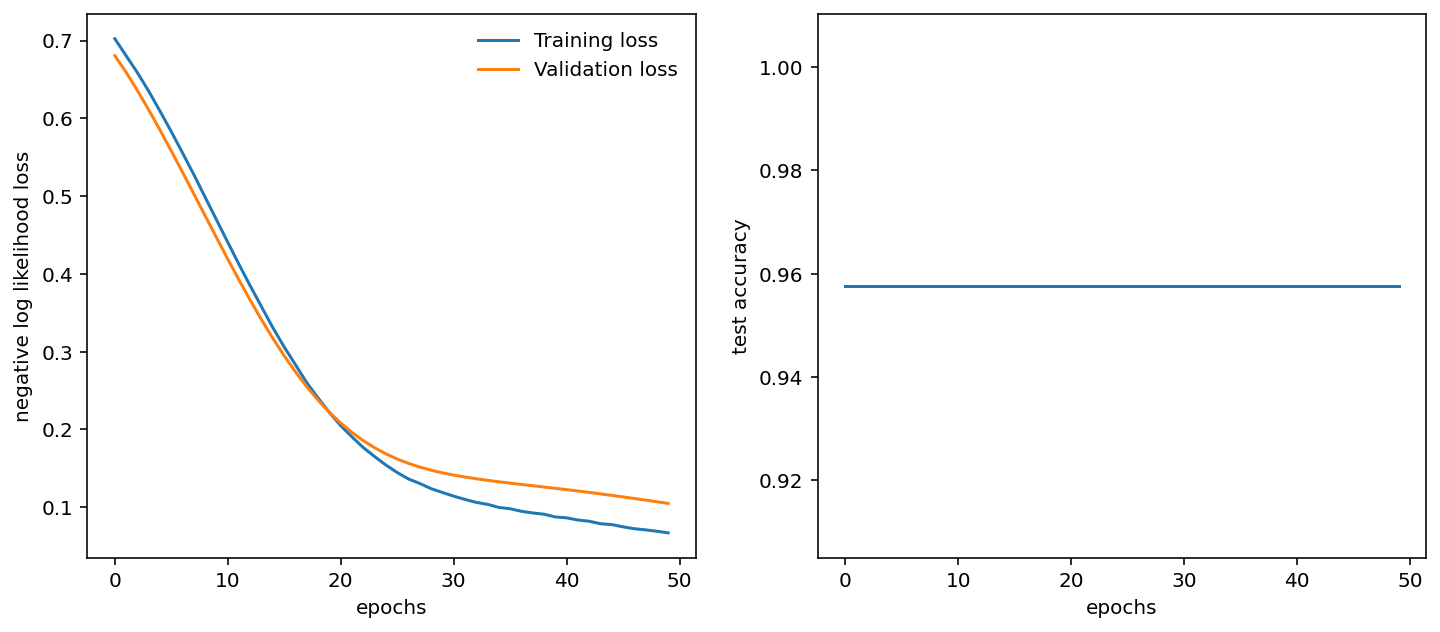

In [87]:
#  plot the losses and the change of accuracy through each epoch
plt.figure(figsize=(12, 5))
ax = plt.subplot(121)
plt.xlabel('epochs')
plt.ylabel('negative log likelihood loss')
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False);
plt.subplot(122)
plt.xlabel('epochs')
plt.ylabel('test accuracy')
plt.plot(test_accuracies);